# COGS 108 - The Pursuit of Happiness

# Overview

In this project, we were interested in finding out which factors in a person's life and environment contributed the most to their overall happiness. To answer this question, we analyzed data from the Gallup World Poll taken from various world countries in the years 2005-2021. This data contains measurements of specific features of a country such as GDP, life expectancy, freedom to make life choices, etc. and their overall average life satisfaction and positive affect. With this data, we conducted statistical tests to find the feature that causes the largest difference in average life satisfaction. We also used multiple linear regression to determine which features were the strongest overall predictors of average life satisfaction and average positive affect. Overall, we found that GDP caused the largest difference in life satisfaction between countries. Social support was the strongest predictor of life satisfaction and freedom to make life choices was the strongest predictor of positive affect.

# Names

- Alan Wang
- An Huynh
- Hana Vaid
- Seung Huh
- Shreya Vanaki

<a id='research_question'></a>
# Research Question

According to Gallup’s World Happiness report’s dataset, which of the six indicators (GDP per capita, healthy life expectancy, social support, freedom to make life choices, generosity, corruption perception) most strongly predicts happiness across the countries surveyed ?:

- What indicator displays the largest difference in life satisfaction between the top 15% of the countries and the bottom 15% of the countries, in terms that specific indicator?
- Which indicator overall is the most strongly correlated with life satisfaction up to 2021?
- Which indicator overall is the most strongly correlated with positive affect up to 2020?

<a id='background'></a>

## Background & Prior Work

During a time when the opportunities for happiness seem far and fewer in between, we want to ask the question: what makes a person happy? And why are certain countries happier than others? By asking these questions, we hope to understand happiness more and measure whether it's dependent on specific circumstances or not. There have been many theories about what leads to happiness, one of them being Maslow’s hierarchy of needs, which stresses that humans feel most satisfied when their biological needs, social needs, and economic needs are met (based on the size/location of these predictors on Maslow’s pyramid) (4).

One scientific measure of happiness is the World Happiness Report for 2021, which reviews the worldwide trends in the happiness score as well as patterns in the importance of the six factors of happiness in determining overall happiness in each country. The data is derived from the Gallup World Poll. Since the release of its first World Happiness Report, the method of data collection has remained constant, that is each year’s reports are built upon a set of questions asked in the survey. This report uses measurements based on the Cantril ladder, where users are asked to rank their life satisfaction on a scale of 0 to 10. Ever since it was established, countries all over as well as, a range of institutions have used the World Happiness Index in various aspects such as economic research, geographic legislation of public policy and many more (3).

There have been several studies done on past versions of the World Happiness Report. One such analysis performed by XuanKhanh Nguyen on 2015 data from this report found that the report’s happiness scores were most strongly correlated with GDP, healthy life expectancy, and social support (1). Another report on the 2006 version of this report by Angus Deaton found that “average life satisfaction is strongly related to per capita national income; each doubling of income is associated with a near one point increase in life satisfaction on a scale from 0 to 10” (2). Deaton notes that this may be because national income can lessen the effects of aging on health.

Overall happiness can be defined using several different factors. Deaton argues that life satisfaction (the measure Gallup uses for happiness) is not necessarily equal to overall happiness, and that happiness can also be measured by positive affect (e.g how happy a person feels in their everyday life) (2). Because of this, we plan to examine both life satisfaction and positive affect in our analysis.

References (include links):
1. https://towardsdatascience.com/happiness-and-life-satisfaction-ecdc7d0ab9a5
2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2680297/
3. https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf
4. https://www.simplypsychology.org/maslow.html
5. https://news.gallup.com/poll/105226/world-poll-methodology.aspx


# Hypothesis

We predict that life expectancy would be the strongest predictor of happiness for the surveyed countries. We make this prediction based on our assumption that people can only be happy if their basic needs are met, (as theorized by Maslow’s Hierarchy of Needs). Therefore, the countries that display higher levels of life expectancy would have higher happiness overall.

# Dataset(s)

Based on the research question we have selected, we are planning to use the dataset from Gallup’s World Happiness Report, which contains data from the Gallup World Poll from 2005-2021.

- **Dataset Name: World Happiness Report for 2021**
- Link to the dataset:
    - https://happiness-report.s3.amazonaws.com/2021/DataForFigure2.1WHR2021C2.xls
- Number of observations:
    - 149 countries
- Description:
    - Researchers measured the GDP and healthy life expectancy of each country and took data from the Gallup World Poll. Scientists carried out this poll by asking people from each country basic questions to gather opinion on several different categories. These questions included both “yes or no” and rating questions to express their thoughts on the matter (Yes being a 1, No being a 0; rating from 1-10). This dataset contains the measurements and data from the poll from countries in 2021. <br>
        Description of dataset variables from Gallup World Happiness Report appendix (3):
        - GDP per capita (international dollars)
        - Healthy Life expectancy (years)
        - Social support - Do people in that country have friends they can count on for help? (average of yes/no responses)
        - Freedom to make life choices - Are people in that country satisfied with their freedom to choose? (average of yes/no responses)
        - Generosity - Have people in that country donated to charity in the last month? (average of yes/no responses)
        - Perception of corruption - Do people feel that corruption is widespread in their country? (average of yes/no responses)
        - Overall life satisfaction (ladder score) - How satisfied are people in that country with their life? (average of ratings 1-10)    
       
- **Dataset Name: World Happiness Reports prior to 2021**
- Link to the dataset:
    - https://happiness-report.s3.amazonaws.com/2021/DataPanelWHR2021C2.xls
- Number of observations:
    - 166 countries (1949 observations overall due to multiple years)
- Description:
    - In addition to all the features of the previous dataset, this dataset contains observations taken from countries during the years 2005-2020. It also contains other 2 variables: positive and negative affect: 
        - Positive affect - Have people in that country recently experienced feelings of joy? (average of yes/no responses)
        - Negative affect - Have people in that country recently experienced feelings of worry/anger/sadness? (average of yes/no responses).

Dataset for reports prior to 2021 will be merged with the 2021 dataset. However, due to the lack of certain features within the 2021 dataset, we will omit the data that does not overlap with each other.

# Setup

In [1]:
# Importing necessary libraries to use during the cleaning as well as the analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_ind
from scipy.stats import t

In [2]:
# Read in the csv files
df1 = pd.read_csv('./DataForFigure2.1WHR2021C2.csv')
df2 = pd.read_csv('./DataPanelWHR2021C2.csv')

# Data Cleaning

To answer the first and second parts of our data science question, we want the Gallup World Health Report to include all years up to 2021. Therefore, we need to combine both the data from 2021 and the data from earlier years into one.

After reading in both our csv datasets-df1 and df2- we proceeded to first clean df1 by selecting and renaming the columns and or categories we deemed essential to our research question for better formatting. To clean up df2, we renamed the columns we needed here as well to match them with the columns of df1. Moving on, both data frames were then concatenated, or linked and sorted by alphabetical order by country. We then used the dataframe.pop() method to remove columns that wouldn’t be relevant. After manipulating and filtering these dataframes, we proceeded to reset the indices to make our data sequential. Lastly, we decided to remove any rows that had NaN values for any of our indicators of happiness/outcome variables. Our data is now in a usable format.

For our third question, because the 2021's data does not include the data for positive affect and negative affect, we use the data from earlier years and leave as is.

Apart from importing the necessary library packages and dataset and taking steps to clean and manipulate our datasets, there were no other pre-processing steps done.

In [3]:
# Cleaning up df1: Picking necessary columns, renaming the columns, inserting a column for proper concatenation
df1 = df1[['Country name', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
df1.columns = ['country_name', 'life_satisfaction', 'GDP', 'social_support', 'life_expectancy', 'choice_freedom', 'generosity', 'corr_perception']
df1.insert(loc=1, column='year', value=2021)

# Cleaning up df2: Renaming the columns
df2.columns = ['country_name', 'year', 'life_satisfaction', 'GDP', 'social_support', 'life_expectancy', 'choice_freedom', 'generosity', 'corr_perception', 'pos_affect', 'neg_affect']

In [4]:
# Concatenating the two data frames: First concatenate, sort by name and year, pop unnecessary columns, reset the indices
df1 = pd.concat([df1, df2])
df1 = df1.sort_values(['country_name', 'year'], ascending = True)
df1.pop('pos_affect')
df1.pop('neg_affect')
df1.reset_index(drop=True)

,country_name,year,life_satisfaction,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception
0,Afghanistan,2008,3.724,7.370,0.451,50.800,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.540,0.552,51.200,0.679,0.190,0.850
2,Afghanistan,2010,4.758,7.647,0.539,51.600,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.620,0.521,51.920,0.496,0.162,0.731
4,Afghanistan,2012,3.783,7.705,0.521,52.240,0.531,0.236,0.776
...,...,...,...,...,...,...,...,...,...
2093,Zimbabwe,2017,3.638,8.016,0.754,55.000,0.753,-0.098,0.751
2094,Zimbabwe,2018,3.616,8.049,0.775,55.600,0.763,-0.068,0.844
2095,Zimbabwe,2019,2.694,7.950,0.759,56.200,0.632,-0.064,0.831
2096,Zimbabwe,2020,3.160,7.829,0.717,56.800,0.643,-0.009,0.789


In [5]:
# Drop all the rows with any NaN columns
df1.dropna(subset = ['life_satisfaction', 'GDP', 'social_support', 'life_expectancy', 'choice_freedom', 'generosity', 'corr_perception'], inplace = True)
df2.dropna(subset = ['life_satisfaction', 'GDP', 'social_support', 'life_expectancy', 'choice_freedom', 'generosity', 'corr_perception', 'pos_affect'], inplace = True)

We now have two datasets that are ready for analysis: df1 contains the data on life satisfaction from countries up to 2021, df2 contains the data on positive affect from countries up to 2020

In [6]:
df1

,country_name,year,life_satisfaction,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception
0,Afghanistan,2008,3.724,7.370,0.451,50.800,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.540,0.552,51.200,0.679,0.190,0.850
2,Afghanistan,2010,4.758,7.647,0.539,51.600,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.620,0.521,51.920,0.496,0.162,0.731
4,Afghanistan,2012,3.783,7.705,0.521,52.240,0.531,0.236,0.776
...,...,...,...,...,...,...,...,...,...
1945,Zimbabwe,2017,3.638,8.016,0.754,55.000,0.753,-0.098,0.751
1946,Zimbabwe,2018,3.616,8.049,0.775,55.600,0.763,-0.068,0.844
1947,Zimbabwe,2019,2.694,7.950,0.759,56.200,0.632,-0.064,0.831
1948,Zimbabwe,2020,3.160,7.829,0.717,56.800,0.643,-0.009,0.789


In [7]:
df2

,country_name,year,life_satisfaction,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception,pos_affect,neg_affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


# Data Analysis & Results

## EDA ##

### Distributions of variables 
We first want to see the distributions of each variable visually to spot any skewness for possible outliers that may exist (within df1 and df2, per category). Because df2 only lacks the data from year 2021, there isn't much of a difference when it comes shape, center, and variability. Hence, the following statements apply to both dataframes.

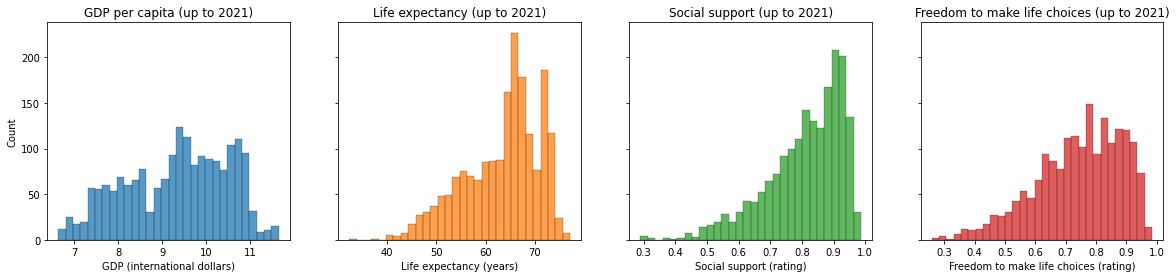

In [8]:
# Plotting GDP, life expectancy, social support, and freedom to make choices from 2021
palette = sns.color_palette('tab10'); 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
sns.set_palette("flare")
sns.histplot(df1['GDP'], ax=ax1, kde=False, bins=30, color=palette[0])
ax1.set_title('GDP per capita (up to 2021)')
ax1.set_xlabel('GDP (international dollars)')

sns.histplot(df1['life_expectancy'],ax=ax2, kde=False, bins=30, color=palette[1])
ax2.set_title('Life expectancy (up to 2021)')
ax2.set_xlabel('Life expectancy (years)')

sns.histplot(df1['social_support'],ax=ax3, kde=False, bins=30, color=palette[2])
ax3.set_title('Social support (up to 2021)')
ax3.set_xlabel('Social support (rating)')

sns.histplot(df1['choice_freedom'],ax=ax4, kde=False, bins=30, color=palette[3])
ax4.set_title('Freedom to make life choices (up to 2021)')
ax4.set_xlabel('Freedom to make life choices (rating)')
fig.set_figwidth(20)

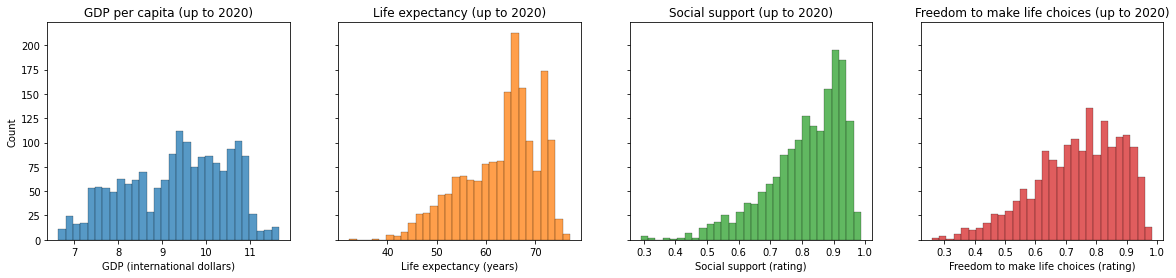

In [9]:
# Plotting GDP, life expectancy, social support, and freedom to make choices from 2020
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
sns.set_palette("flare")
sns.histplot(df2['GDP'], ax=ax1, kde=False, bins=30, color=palette[0])
ax1.set_title('GDP per capita (up to 2020)')
ax1.set_xlabel('GDP (international dollars)')

sns.histplot(df2['life_expectancy'],ax=ax2, kde=False, bins=30, color=palette[1])
ax2.set_title('Life expectancy (up to 2020)')
ax2.set_xlabel('Life expectancy (years)')

sns.histplot(df2['social_support'],ax=ax3, kde=False, bins=30, color=palette[2])
ax3.set_title('Social support (up to 2020)')
ax3.set_xlabel('Social support (rating)')

sns.histplot(df2['choice_freedom'],ax=ax4, kde=False, bins=30, color=palette[3])
ax4.set_title('Freedom to make life choices (up to 2020)')
ax4.set_xlabel('Freedom to make life choices (rating)')
fig.set_figwidth(20)

- The distribution for GDP per capita appears to be fairly normally distributed. It appears to be centered around 9-10 dollars and is variable with a range of around 4-5 dollars.
- The distribution for average life expectancy appears to be slightly left skewed. It appears to be centered around 60-65 years and is variable with a range of around 40 years.
- The distribution for social support appears to be fairly left skewed. It appears to be centered around 0.8-0.85 and is variable with a range of around 0.9
- The distribution for freedom of life choices appears to be skewed to the left. It appears to be centered around0.72-0.75 and is variable with a range of around 0.55

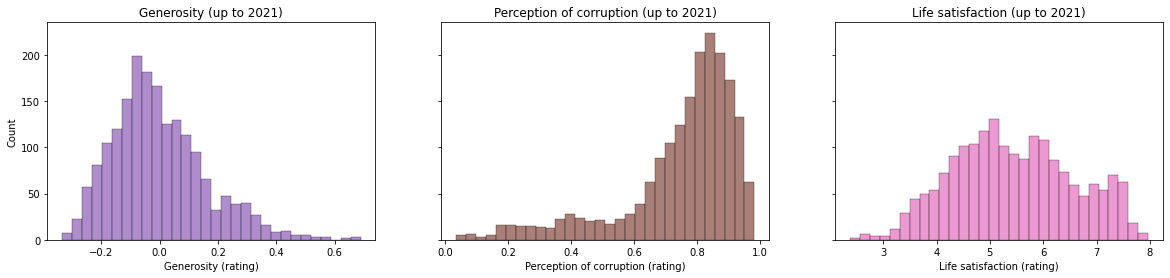

In [10]:
# Plotting Generosity, Perception of corruption, and Life satisfaction from 2021
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.set_palette("flare")
sns.histplot(df1['generosity'], ax=ax1, kde=False, bins=30, color=palette[4])
ax1.set_title('Generosity (up to 2021)')
ax1.set_xlabel('Generosity (rating)')

sns.histplot(df1['corr_perception'], ax=ax2, kde=False, bins=30, color=palette[5])
ax2.set_title('Perception of corruption (up to 2021)')
ax2.set_xlabel('Perception of corruption (rating)')

sns.histplot(df1['life_satisfaction'], ax=ax3, kde=False, bins=30, color=palette[6])
ax3.set_title('Life satisfaction (up to 2021)' )
ax3.set_xlabel('Life satisfaction (rating)')

fig.set_figwidth(20)

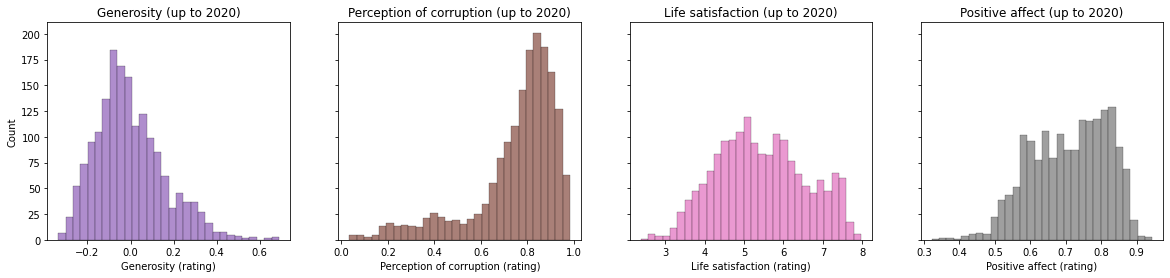

In [11]:
# Plotting Generosity, Perception of corruption, Life satisfaction, and positive affect from 2021
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
sns.set_palette("flare")
sns.histplot(df2['generosity'], ax=ax1, kde=False, bins=30, color=palette[4])
ax1.set_title('Generosity (up to 2020)')
ax1.set_xlabel('Generosity (rating)')

sns.histplot(df2['corr_perception'], ax=ax2, kde=False, bins=30, color=palette[5])
ax2.set_title('Perception of corruption (up to 2020)')
ax2.set_xlabel('Perception of corruption (rating)')

sns.histplot(df2['life_satisfaction'], ax=ax3, kde=False, bins=30, color=palette[6])
ax3.set_title('Life satisfaction (up to 2020)' )
ax3.set_xlabel('Life satisfaction (rating)')

sns.histplot(df2['pos_affect'], ax=ax4, kde=False, bins=30, color=palette[7])
ax4.set_title('Positive affect (up to 2020)' )
ax4.set_xlabel('Positive affect (rating)')
fig.set_figwidth(20)

- The distribution for generosity appears to be skewed to the right. It appears to be centered around 0.1-0.15 and is variable with a range of around 0.7.
- The distribution for corruption perception seems to be skewed to the right. It appears to be centered from around 0.6-0.9, and is a variable with a range of around 0.85.
- The distribution for life_satisfaction appears to be fairly normally distributed. It appears to be centered from 4-6.5 and is variable with a range of around 5.
- The distribution for pos_affect score appears to be fairly normally distributed with a slight skew towards the right. It appears to be centered around 0.75-0.85 and is variable with a range of around 0.5.

### Outliers

To get a more specific idea of how many outliers each category has, we will construct a boxplot for each variable. We predict that social support, freedom to make life choices, generosity, and corruption perception are the most susceptible to outliers, since they are more affected by decisions made at the individual/country level. 

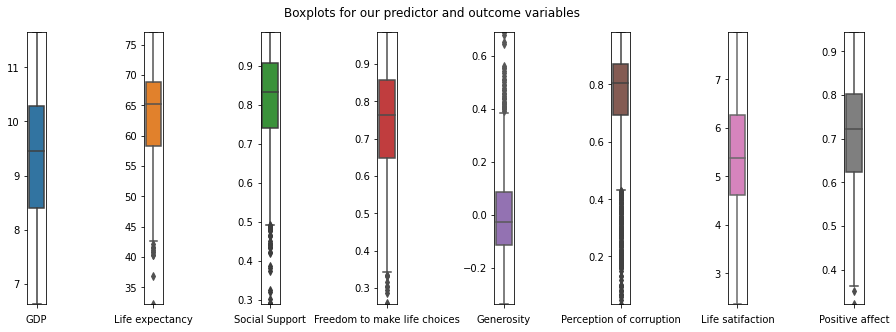

In [12]:
# Construct boxplots for each variable 
# Source: https://stackoverflow.com/questions/62404884/boxplot-with-different-y-axes-and-different-y-scales-in-seaborn
selection = ['GDP','life_expectancy','social_support','choice_freedom','generosity', 'corr_perception', 'life_satisfaction']
labels = ['GDP', 'Life expectancy', 'Social Support', 'Freedom to make life choices','Generosity', 'Perception of corruption', 'Life satifaction', 'Positive affect']
fig, axes = plt.subplots(1, len(selection) + 1, figsize=(15, 5))
plt.subplots_adjust(wspace = 5)
fig.suptitle('Boxplots for our predictor and outcome variables', y=0.95)
for i, col in enumerate(selection):
    ax = sns.boxplot(y=df1[col], ax=axes.flatten()[i], color=palette[i])
    ax.set_ylim(df1[col].min(), df1[col].max())
    ax.yaxis.label.set_visible(False)
    ax.set_xlabel(labels[i])
    
# Add positive affect from df2
ax = sns.boxplot(y=df2['pos_affect'], ax=axes.flatten()[len(selection)], color=palette[len(selection)]);
ax.set_ylim(df2['pos_affect'].min(), df2['pos_affect'].max())
ax.yaxis.label.set_visible(False)
ax.set_xlabel(labels[len(selection)])
plt.show()

From these boxplots, we can see that our prediction was somewhat correct. Social support, generosity, and perception of corruption all had more outliers than the other categories. Life expectancy, freedom to make life choices, and positive affect also had some outliers, but not as many as the other 3 categories.  

Something surprising to note is that while most categories had outliers with lower values than normal, generosity had outliers with higher values than normal. This somewhat makes sense since charity typically is only done by developed countries, which make up a small subset of the world. We can also see that while perception of corruption had low outliers, this means that a high perception of corruption was reported from the majority of countries. This could also be related to the fact that developed countries are a small subset of the world, since developed countries are less likely to have government corruption, in contrast to the many developing countries.  

Since all the outliers are within the bounds for our variables and we do not want to arbitrarily exclude certain countries/years from our data and create bias, we will keep these outliers in our dataset for analysis. 

### Relationships between variables 

#### Relationships between indicators of happiness ####

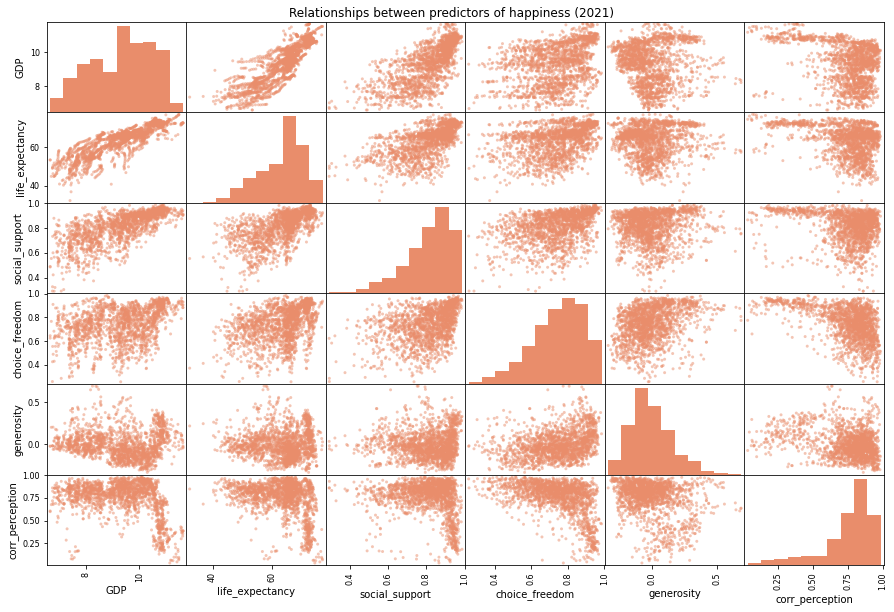

In [13]:
# Plot scatter matrix for 6 indicators for happiness 
fig=pd.plotting.scatter_matrix(df1[['GDP','life_expectancy','social_support','choice_freedom','generosity', 'corr_perception']], figsize=(15, 10));
plt.suptitle('Relationships between predictors of happiness (2021)', y = 0.9)
plt.show()

From this scatter matrix, we can see that GDP, social support, and life expectancy are all positively correlated with one another. Generosity does not seem to be correlated with any indicators, and perception of corruption appears to be weakly negatively correlated with the four indicators mentioned previously.

#### Relationships between indicators of happiness and life satisfaction ####

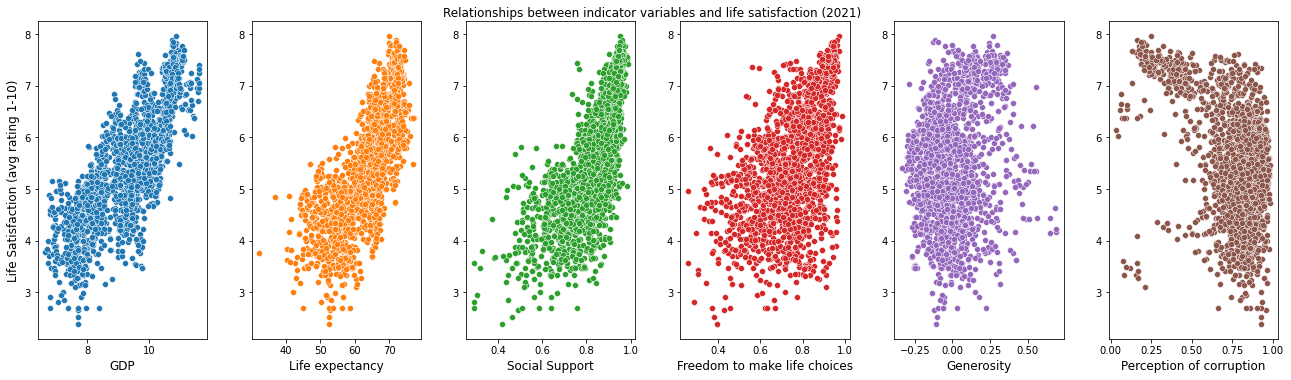

In [14]:
# Plot scatter matrix for 6 indicators vs life_satisfaction
selection = ['GDP','life_expectancy','social_support','choice_freedom','generosity', 'corr_perception']
labels = ['GDP', 'Life expectancy', 'Social Support', 'Freedom to make life choices','Generosity', 'Perception of corruption']
fig, axes = plt.subplots(1, len(selection), figsize=(18, 5))
fig.tight_layout()
fig.suptitle('Relationships between indicator variables and life satisfaction (2021)', y=1)
for i, col in enumerate(selection):
    ax = sns.scatterplot(x=df1[col], y=df1['life_satisfaction'], ax=axes.flatten()[i], color=palette[i])
    if(i == 0): 
        ax.set_ylabel('Life Satisfaction (avg rating 1-10)', fontsize=12)
    else:
        ax.set(ylabel=None)
    ax.set_xlabel(labels[i], fontsize=12)
plt.show()

From this set of scatterplots, we can see that for each country in a given year, GDP, social support, life expectancy, and freedom to make life choices all appear to be positively correlated with that country's life satisfaction. However, freedom to make life choices has a noticably weaker correlation. Generosity does not seem to have a correlation, while perception of corruption appears to have a weak negative correlation with life satisfaction.

#### Relationships between indicators of happiness and positive affect #####

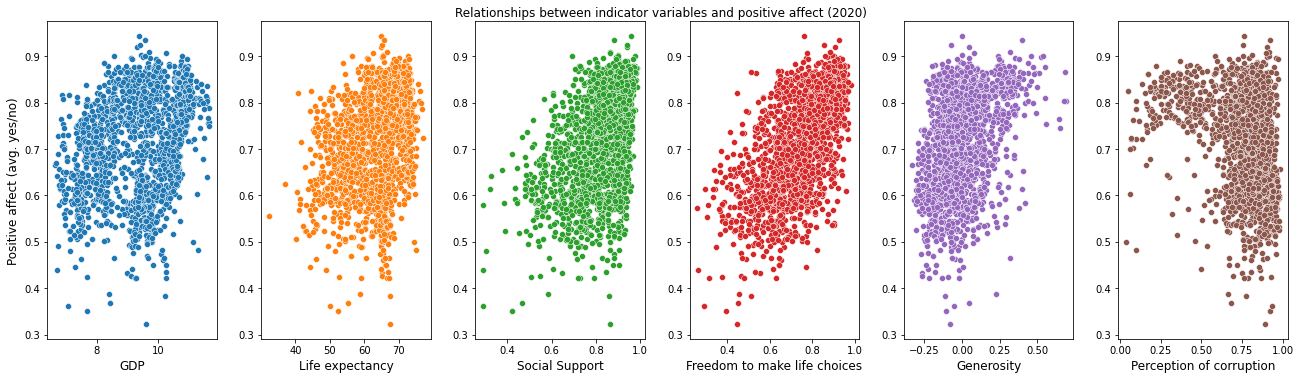

In [15]:
# Plot scatter matrix for 6 indicators vs positive affect (measure of feeling happiness)
fig, axes = plt.subplots(1, len(selection), figsize=(18, 5))
fig.tight_layout()
fig.suptitle('Relationships between indicator variables and positive affect (2020)', y=1)
for i, col in enumerate(selection):
    ax = sns.scatterplot(x=df2[col], y=df2['pos_affect'], ax=axes.flatten()[i], color=palette[i])
    if(i == 0): 
        ax.set_ylabel('Positive affect (avg. yes/no)', fontsize=12)
    else:
        ax.set(ylabel=None)
    ax.set_xlabel(labels[i], fontsize=12)
plt.show()

From this set of scatterplots, we can see that for each country in a given year, social support and freedom to make life choice  appear to be positively correlated with positive affect, while generosity appears to have a weaker correlation. Perception of corruption also has a weaker negative correlation with positive affect. GDP and life expectancy do not appear to have any correlation with positive affect.

## Analysis ##

### What indicator displays the largest difference in life satisfaction between the top 15% of the countries and the bottom 15% of the countries, in terms that specific indicator? 

To answer this question, we will find the countries that fell into the top 15% and bottom 15% for each of the six indicators of happiness in any given year.  
We will then run a t-test for each indicator to find out which indicator causes the largest and most significant difference in average life satisfaction between its top 15% and bottom 15% of countries.

#### GDP

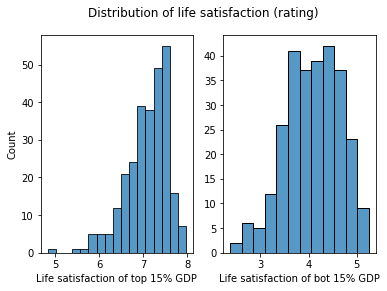

In [16]:
# Compare life satisfaction of top 15% GDP with bottom 15% GDP
# Separate top 15% and bottom 15%
df1_copy = df1.sort_values('GDP', ascending = True)
bot15_gdp = df1_copy.head(int(len(df1_copy) * 0.15))
top15_gdp = df1_copy.tail(int(len(df1_copy) * 0.15))

# Compare distributions of life satisfaction
fig, axes = plt.subplots(1, 2)
fig.suptitle('Distribution of life satisfaction (rating)')
ax1 = sns.histplot(x = 'life_satisfaction', data=top15_gdp, ax=axes[0], color=palette[0])
axes[0].set(xlabel='Life satisfaction of top 15% GDP')
ax2 = sns.histplot(x = 'life_satisfaction', data=bot15_gdp, ax=axes[1], color=palette[0])
axes[1].set(xlabel='Life satisfaction of bot 15% GDP')
axes[1].set(ylabel=None)
plt.show()

The distribution of life satisfaction for the top 15% countries in terms of GDP appears to be less variable and centered around 7-8 ladder score, while the distribution of life satisfaction for the bottom 15% in terms of GDP appears to be more variable and centered around 4 ladder score.

In [17]:
t_bot_gdp = bot15_gdp['life_satisfaction']
t_top_gdp = top15_gdp['life_satisfaction']
t_val_gdp, p_val_gdp = stats.ttest_ind(t_bot_gdp, t_top_gdp)
t_val_gdp, p_val_gdp

(-67.27655309727487, 2.536471413876126e-269)

The p-value is $2.536471413876126e-269$ which means that we reject the null hypothesis in favor of alternative hypothesis. The difference of life_satisfaction means between the bottom 15% and the top 15% in terms of GDP likely did not happen due to chance alone.

In [18]:
life_satisfaction_diff_gdp = top15_gdp['life_satisfaction'].mean() - bot15_gdp['life_satisfaction'].mean()
life_satisfaction_diff_gdp

2.9937060931899637

The difference of average life satisfaction between the top 15% and the bottom 15% of countries in terms of GDP is $2.9937060931899637$.

#### Life expectancy

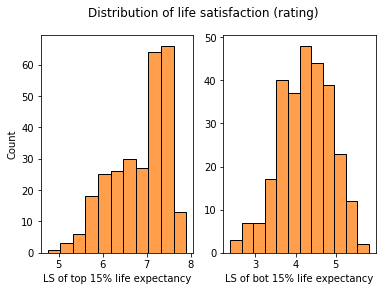

In [19]:
# Compare life satisfaction of top 15% life expectancy with bottom 15% life expectancy 
# Separate top 15% and bottom 15%
df1_copy = df1.sort_values('life_expectancy', ascending = True)
bot15_le = df1_copy.head(int(len(df1_copy) * 0.15))
top15_le = df1_copy.tail(int(len(df1_copy) * 0.15))

# Compare distributions of life satisfaction
fig, axes = plt.subplots(1, 2)
fig.suptitle('Distribution of life satisfaction (rating)')
ax1 = sns.histplot(x = 'life_satisfaction', data=top15_le, ax=axes[0], color=palette[1])
axes[0].set(xlabel='LS of top 15% life expectancy')
ax2 = sns.histplot(x = 'life_satisfaction', data=bot15_le, ax=axes[1], color=palette[1])
axes[1].set(xlabel='LS of bot 15% life expectancy')
axes[1].set(ylabel=None)
plt.show()

The distribution of life satisfaction for the top 15% countries in terms of life expectancy appears to be more variable and centered around 6-7 life_satisfaction, while the distribution of life satisfaction for the bottom 15% in terms of life expectancy appears to be less variable and centered around 4-5 life_satisfaction.

In [20]:
t_bot_le = bot15_le['life_satisfaction']
t_top_le = top15_le['life_satisfaction']
t_val_le, p_val_le = stats.ttest_ind(t_bot_le, t_top_le)
t_val_le, p_val_le

(-47.78303863401582, 5.222193322406462e-199)

The p-value is $5.222193322406462e-199$ which means that we reject the null hypothesis in favor of alternative hypothesis. The difference of life_satisfaction means between the bottom 15% and the top 15% in terms of life expectancy likely did not happen due to chance alone.

In [21]:
life_satisfaction_diff_le = top15_le['life_satisfaction'].mean() - bot15_le['life_satisfaction'].mean()
life_satisfaction_diff_le

2.588129032258064

The difference of average life satisfcation between the top 15% and the bottom 15% of countries in terms of life expectancy is $2.588129032258064$.

#### Social support

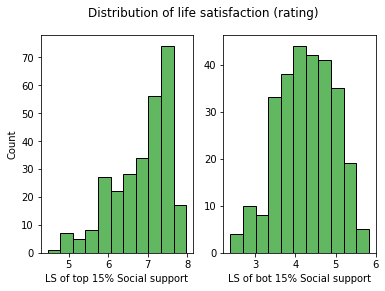

In [22]:
# Compare life satisfaction of top 15% social support with bottom 15% social support 
# Separate top 15% and bottom 15%
df1_copy = df1.sort_values('social_support', ascending = True)
bot15_ss = df1_copy.head(int(len(df1_copy) * 0.15))
top15_ss = df1_copy.tail(int(len(df1_copy) * 0.15))

# Compare distributions of life satisfaction
fig, axes = plt.subplots(1, 2)
fig.suptitle('Distribution of life satisfaction (rating)')
ax1 = sns.histplot(x = 'life_satisfaction', data=top15_ss, ax=axes[0], color=palette[2])
axes[0].set(xlabel='LS of top 15% Social support')
ax2 = sns.histplot(x = 'life_satisfaction', data=bot15_ss, ax=axes[1], color=palette[2])
axes[1].set(xlabel='LS of bot 15% Social support')
axes[1].set(ylabel=None)
plt.show()

The distribution of life satisfaction for the top 15% countries in terms of social support appears to be centered around 7-8 life_satisfaction, while the distribution of life satisfaction for the bottom 15% in terms of social support centered around 4-5 life_satisfaction. Both distributions appear to have the same spread.

In [23]:
t_bot_ss = bot15_ss['life_satisfaction']
t_top_ss = top15_ss['life_satisfaction']
t_val_ss, p_val_ss = stats.ttest_ind(t_bot_ss, t_top_ss)
t_val_ss, p_val_ss

(-43.470329189440875, 5.510567952469178e-181)

The p-value is $5.510567952469178e-181$ which means that we reject the null hypothesis in favor of alternative hypothesis. The difference of life_satisfaction means between the bottom 15% and the top 15% in terms of social support likely did not happen due to chance alone.

In [24]:
life_satisfaction_diff_ss = top15_ss['life_satisfaction'].mean() - bot15_ss['life_satisfaction'].mean()
life_satisfaction_diff_ss

2.5963548387096784

The difference of average life satisfaction between the top 15% and the bottom 15% in terms of social support is $2.5963548387096784$.

#### Freedom to make life choices

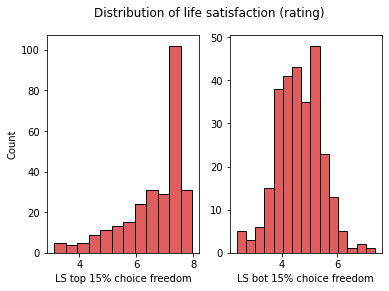

In [25]:
# Compare life satisfaction of top 15% choice freedom with bottom 15% choice freedom
# Separate top 15% and bottom 15%
df1_copy = df1.sort_values('choice_freedom', ascending = True)
bot15_cf = df1_copy.head(int(len(df1_copy) * 0.15))
top15_cf = df1_copy.tail(int(len(df1_copy) * 0.15))

# Compare distributions of life satisfaction
fig, axes = plt.subplots(1, 2)
fig.suptitle('Distribution of life satisfaction (rating)')
ax1 = sns.histplot(x = 'life_satisfaction', data=top15_cf, ax=axes[0], color=palette[3])
axes[0].set(xlabel='LS top 15% choice freedom')
ax2 = sns.histplot(x = 'life_satisfaction', data=bot15_cf, ax=axes[1], color=palette[3])
axes[1].set(xlabel='LS bot 15% choice freedom')
axes[1].set(ylabel=None)
plt.show()

The distribution of life satisfaction for the top 15% countries in terms of choice freedom appears to be more variable and centered around 7 life_satisfaction, while the distribution of life satisfaction for the bottom 15% in terms of social support appears to be less variable and centered around 4-5 life_satisfaction.

In [26]:
t_bot_cf = bot15_cf['life_satisfaction']
t_top_cf = top15_cf['life_satisfaction']
t_val_cf, p_val_cf = stats.ttest_ind(t_bot_cf, t_top_cf)
t_val_cf, p_val_cf

(-25.000428379585692, 5.126607323235468e-93)

The p-value is $5.126607323235468e-93$ which means that we reject the null hypothesis in favor of alternative hypothesis. The difference of life_satisfaction means between the bottom 15% and the top 15% in terms of choice freedom likely did not happen due to chance alone.

In [27]:
life_satisfaction_diff_cf = top15_cf['life_satisfaction'].mean() - bot15_cf['life_satisfaction'].mean()
life_satisfaction_diff_cf

2.0042043010752675

The difference of average life satisfaction between the top 15% and the bottom 15% of countries in terms of freedom to make life choices is $2.0042043010752675$.

#### Generosity

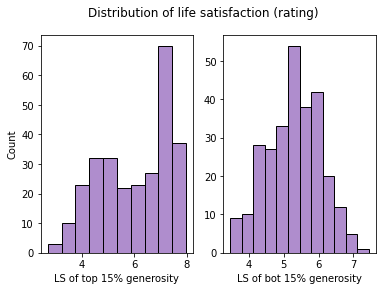

In [28]:
# Compare life satisfaction of top 15% generosity with bottom 15% generosity
# Separate top 15% and bottom 15%
df1_copy = df1.sort_values('generosity', ascending = True)
bot15_g = df1_copy.head(int(len(df1_copy) * 0.15))
top15_g = df1_copy.tail(int(len(df1_copy) * 0.15))

# Compare distributions of life satisfaction
fig, axes = plt.subplots(1, 2)
fig.suptitle('Distribution of life satisfaction (rating)')
ax1 = sns.histplot(x = 'life_satisfaction', data=top15_g, ax=axes[0], color=palette[4])
axes[0].set(xlabel='LS of top 15% generosity')
ax2 = sns.histplot(x = 'life_satisfaction', data=bot15_g, ax=axes[1], color=palette[4])
axes[1].set(xlabel='LS of bot 15% generosity')
axes[1].set(ylabel=None)
plt.show()

The distribution of life satisfaction for the top 15% countries in terms of generosity appears centered around 6-7 life_satisfaction, while the distribution of life satisfaction for the bottom 15% in terms of generosity appears to be centered around 5-6 life_satisfaction. Both distributions appear to have the same spread.

In [29]:
t_bot_g = bot15_g['life_satisfaction']
t_top_g = top15_g['life_satisfaction']
t_val_g, p_val_g = stats.ttest_ind(t_bot_g, t_top_g)
t_val_g, p_val_g

(-7.60471009756298, 1.2247939403066263e-13)

The p-value is $1.2247939403066263e-13$ which means that we reject the null hypothesis in favor of alternative hypothesis. The difference of life_satisfaction means between the bottom 15% and the top 15% in terms of generosity likely did not happen due to chance alone.

In [30]:
life_satisfaction_diff_g = top15_g['life_satisfaction'].mean() - bot15_g['life_satisfaction'].mean()
life_satisfaction_diff_g

0.703297491039427

The difference of average life satisfaction between the top 15% and the bottom 15% in terms of generosity is $0.703297491039427$.

#### Corruption perception

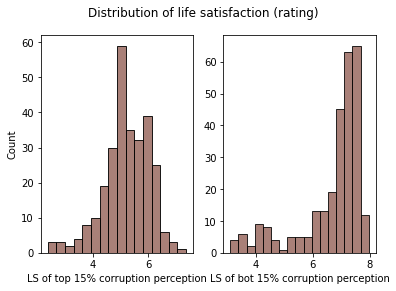

In [31]:
# Compare life satisfaction of top 15% corruption perception with bottom 15% corruption perception
# Separate top 15% and bottom 15%
df1_copy = df1.sort_values('corr_perception', ascending = True)
bot15_cp = df1_copy.head(int(len(df1_copy) * 0.15))
top15_cp = df1_copy.tail(int(len(df1_copy) * 0.15))

# Compare distributions of life satisfaction
fig, axes = plt.subplots(1, 2)
fig.suptitle('Distribution of life satisfaction (rating)')
ax1 = sns.histplot(x = 'life_satisfaction', data=top15_cp, ax=axes[0], color=palette[5])
axes[0].set(xlabel='LS of top 15% corruption perception')
ax2 = sns.histplot(x = 'life_satisfaction', data=bot15_cp, ax=axes[1], color=palette[5])
axes[1].set(xlabel='LS of bot 15% corruption perception')
axes[1].set(ylabel=None)
plt.show()

The distribution of life satisfaction for the top 15% countries in terms of corruption perception appears to be less variable and centered around 5 life_satisfaction, while the distribution of life satisfaction for the bottom 15% in terms of corruption perception appears to be more variable and centered around 6-7 life_satisfaction.

In [32]:
t_bot_cp = bot15_cp['life_satisfaction']
t_top_cp = top15_cp['life_satisfaction']
t_val_cp, p_val_cp = stats.ttest_ind(t_bot_cp, t_top_cp)
t_val_cp, p_val_cp

(17.61238126963468, 1.676149211529168e-55)

The p-value is $1.676149211529168e-55$ which means that we reject the null hypothesis in favor of alternative hypothesis. The difference of life_satisfaction means between the bottom 15% and the top 15% in terms of corruption perception likely did not happen due to chance alone.

In [33]:
life_satisfaction_diff_cp = top15_cp['life_satisfaction'].mean() - bot15_cp['life_satisfaction'].mean()
life_satisfaction_diff_cp

-1.4833333333333343

The difference of average life satisfaction between the top 15% and the bottom 15% of countries in terms of corruption perception is $-1.4833333333333343$.

#### Results

In [34]:
list_of_mean_diffs = { life_satisfaction_diff_gdp: "life_satisfaction_diff_gdp", life_satisfaction_diff_ss: "life_satisfaction_diff_ss", life_satisfaction_diff_le: "life_satisfaction_diff_le", life_satisfaction_diff_cf: "life_satisfaction_diff_cf", life_satisfaction_diff_g: "life_satisfaction_diff_g", life_satisfaction_diff_cp: "life_satisfaction_diff_cp" }
max_diff = list_of_mean_diffs.get(max(list_of_mean_diffs))
max_diff

'life_satisfaction_diff_gdp'

Since **GDP** seems to display the biggest mean difference between the top 15% and the bottom 15% of the data, we will first consider GDP to be the indicator that displays the biggest difference when it comes to life satisfaction.

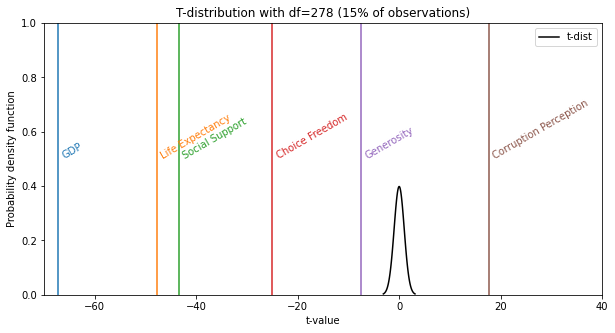

In [52]:
# Plot t values in distribution of t probability density function for comparison
# Source http://pytolearn.csd.auth.gr/d1-hyptest/11/t-distro.html
# Make t distribution
df = len(top15_gdp['life_satisfaction']) - 1
rv = t(df, loc=0, scale=1)
x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 100)
y = rv.pdf(x) 

plt.figure(figsize=(10,5))
plt.xlim(-70, 40)
plt.ylim(0, 1)
plt.plot(x,y, color='black', label='t-dist')

# Plot t values
t_vals = [t_val_gdp, t_val_le, t_val_ss, t_val_cf, t_val_g, t_val_cp]
labels = ['GDP', 'Life Expectancy', 'Social Support', 'Choice Freedom', 'Generosity', 'Corruption Perception']
for i in range(len(t_vals)):
    plt.axvline(x=t_vals[i], ymin=0, ymax=1, color=palette[i])
    plt.text(t_vals[i] + 0.5,0.5,labels[i], color=palette[i], rotation=30)
plt.title('T-distribution with df=278 (15% of observations)')
plt.ylabel('Probability density function')
plt.xlabel('t-value')
plt.legend()
plt.show()

Looking at this t-distribution with all our calculated t-values, we can see that **GDP** also had the most significant difference in life satisfaction between the top 15% and bottom 15%, with a t-value of -67.27655309727487 and a p-value of $2.536471413876126e-269$.

### Which indicator overall is the most strongly correlated with life satisfaction up to 2021? ###

Our analysis above shows that GDP had the largest difference in life satisfaction between the top 15% and bottom 15% of countries in terms of GDP.

However, this does not necessarily mean that GDP is the strongest predictor of life satisfaction overall.

To find out which variable is the overall strongest predictor of life satisfaction, we will conduct multiple linear regression between our 6 predictor variables and our outcome variable of life satisfaction.

In order to conduct this analysis, we need to make sure that our assumptions for multiple linear regression are met, which are:

1. Data has a linear relationship
2. No multicollinearity
3. No auto-correlation
4. Homoscedasticity

#### Checking our assumptions

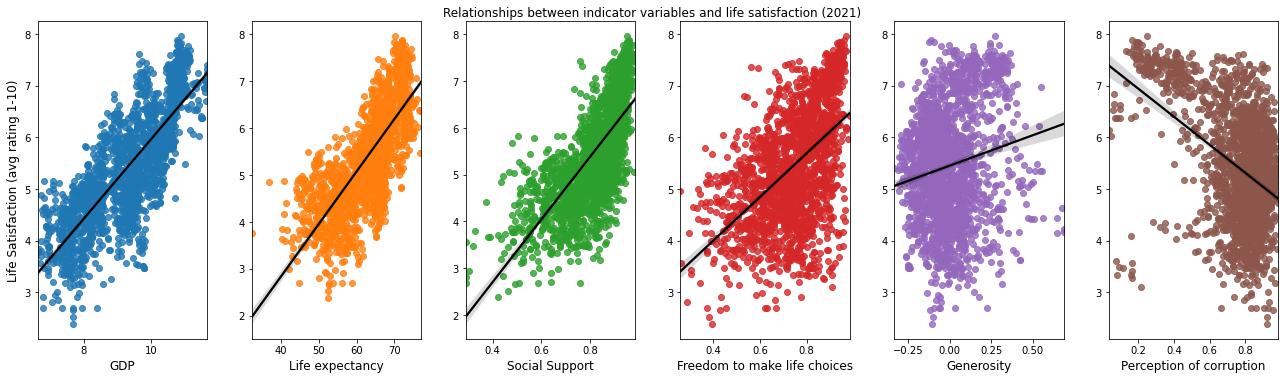

In [36]:
# Plot scatter matrix with regression line for 6 indicators vs life_satisfaction
labels = ['GDP', 'Life expectancy', 'Social Support', 'Freedom to make life choices','Generosity', 'Perception of corruption']
fig, axes = plt.subplots(1, len(selection), figsize=(18, 5))
fig.tight_layout()
fig.suptitle('Relationships between indicator variables and life satisfaction (2021)', y=1)
for i, col in enumerate(selection):
    ax = sns.regplot(x=df1[col], y=df1['life_satisfaction'], ax=axes.flatten()[i], color=palette[i], line_kws={'color':'black'})
    if(i == 0): 
        ax.set_ylabel('Life Satisfaction (avg rating 1-10)', fontsize=12)
    else:
        ax.set(ylabel=None)
    ax.set_xlabel(labels[i], fontsize=12)
plt.show()

Looking at the regression lines in these scatterplots, we see that all 6 variables appear to have a linear relationship with life satisfaction. However, ints for each variable all appear to be somewhat randomly scattered above and below their regression lines (variables are homoscedastic). Next, we will check for multicollinearity within our variables.

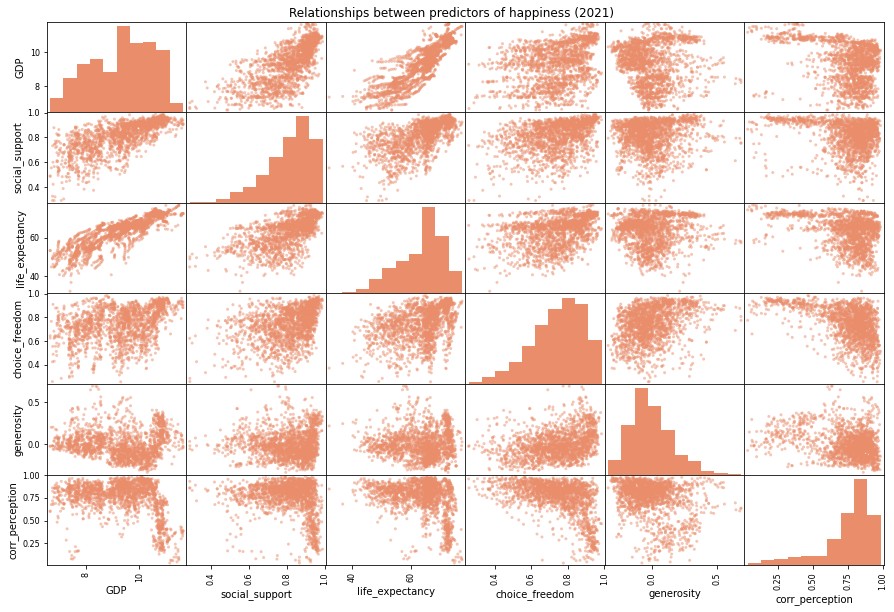

In [37]:
# Revisiting scatter matrix for 6 indicators for happiness in 2021
fig=pd.plotting.scatter_matrix(df1[['GDP','social_support','life_expectancy','choice_freedom','generosity', 'corr_perception']], figsize=(15, 10));
plt.suptitle('Relationships between predictors of happiness (2021)', y = 0.9)
plt.show()

As we noted above in our EDA, looking at the scatter matrix for our indicators of happiness, there appears to be some correlation between GDP, life expectancy and social support. In order to get a more specific idea of this correlation, we will calculate the variance inflation factor(VIF) of our indicators, which measures how correlated each indicator is with the others.

In [38]:
# Calculating VIF of each indicator 
# Source: https://www.statology.org/how-to-calculate-vif-in-python/
#find design matrix for linear regression model using 'rating' as response variable 
y, X = patsy.dmatrices('life_satisfaction ~ GDP + social_support + life_expectancy + choice_freedom + generosity + corr_perception', data=df1, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif

,VIF,variable
0,163.060143,Intercept
1,4.978979,GDP
2,2.207540,social_support
3,3.949699,life_expectancy
4,1.616115,choice_freedom
5,1.189477,generosity
6,1.450883,corr_perception


GDP has the highest VIF, followed by social support and life expectancy. From these results, we can acknowledge that some multicollinearity exists in our data, but this multicollinearity is not enough to severely affect our analysis.

Revisiting our assumptions:

1. All 6 variables appear to have a linear relationship with life satisfaction
2. There is some multicollinearity, but not enough to affect our analysis
3. Since each country surveyed is independent of one another, we can assume that there is no autocorrelation between observations
4. Since points for each variable all appear to be randomly scattered above/below their regression lines, we can assume that the variables are homoscedastic.

Since all our assumptions for multiple linear regression are met, we can carry on with our analysis.

#### Multiple linear regression

In [39]:
# Conduct multiple linear regression
outcome, predictors = patsy.dmatrices('life_satisfaction ~ GDP + social_support + life_expectancy + choice_freedom + generosity + corr_perception', df1)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      life_satisfaction   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     936.9
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:35:58   Log-Likelihood:                -1572.1
No. Observations:                1861   AIC:                             3158.
Df Residuals:                    1854   BIC:                             3197.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.9350      0.167    -

From our regression results, we can see that **social support** has the strongest effect on life satisfaction. For every 1 unit increase in social support, life satisfaction increases by 2.33 units. The predictor with the 2nd strongest effect was freedom to make life choices with an effect size of 1.08.

### Which indicator overall is the most strongly correlated with positive affect up to 2020? ###

Our multiple linear regression found the social support was the overall strongest predictor of life satisfaction. However, as we noted in our background, life satisfaction does not equate to overall happiness. Another measurement of happiness included in the Gallup dataset is **positive affect**. While life satisfaction measures how satisfied people are with their lives overall, positive affect measures whether or not people have recently experienced feelings of happiness. 

To find out which indicator overall is the strongest predictor of positive affect, we will again conduct multiple linear regression between our six indicators of happiness, but with the outcome variable of positive affect.   
This means that we will again need to check our regression assumptions. 

#### Checking our assumptions

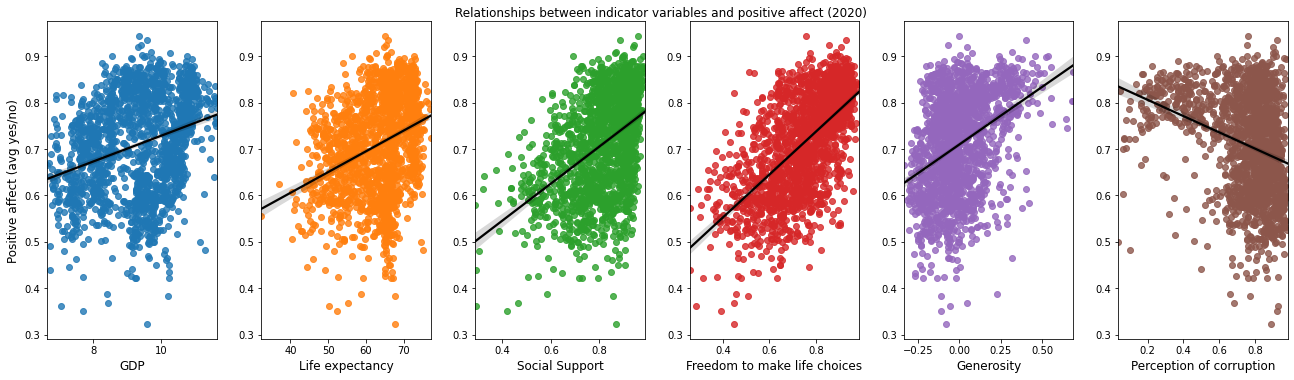

In [40]:
# Plot scatter matrix with regression line for 6 indicators vs pos affect
fig, axes = plt.subplots(1, len(selection), figsize=(18, 5))
fig.tight_layout()
fig.suptitle('Relationships between indicator variables and positive affect (2020)', y=1)
for i, col in enumerate(selection):
    ax = sns.regplot(x=df2[col], y=df2['pos_affect'], ax=axes.flatten()[i], color=palette[i], line_kws={'color':'black'})
    if(i == 0): 
        ax.set_ylabel('Positive affect (avg yes/no)', fontsize=12)
    else:
        ax.set(ylabel=None)
    ax.set_xlabel(labels[i], fontsize=12)
plt.show()

In these regression lines as seen in these scatterplots, we see that all 6 variables appear to have a linear relationship with positive affect, and the points for each variable all appear to be somewhat randomly scattered above and below their regression lines (variables are homoscedastic). Next, we will check for multicollinearity within our variables.

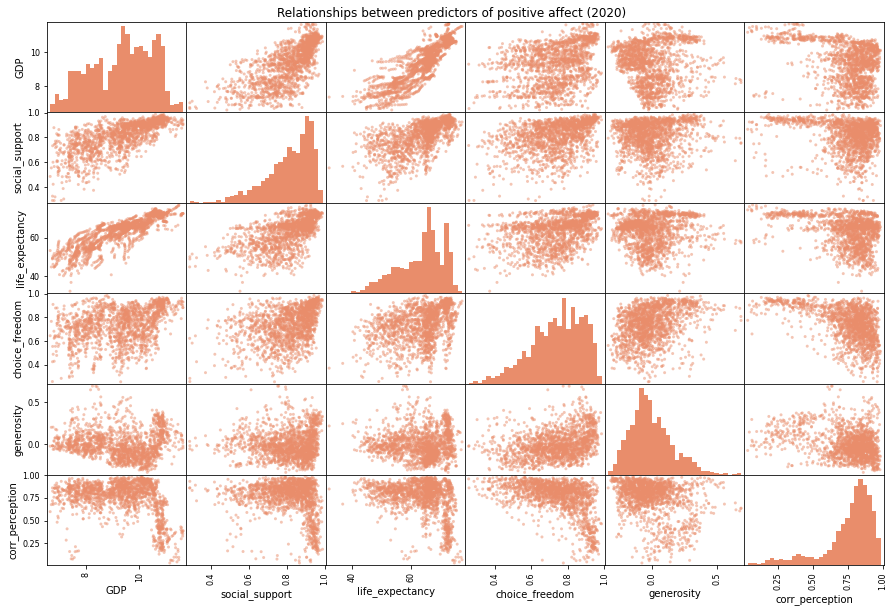

In [41]:
# Revisiting scatter matrix for 6 indicators for happiness in 2020
figure=pd.plotting.scatter_matrix(df2[['GDP','social_support','life_expectancy','choice_freedom','generosity', 'corr_perception']], figsize=(15, 10), hist_kwds={'bins':30});
plt.suptitle('Relationships between predictors of positive affect (2020)', y = 0.9)
plt.show()

There again appears to be some correlation between GDP, life expectancy, and social support. To get a more specific idea of this correlation, we will again calculate the variance inflation factor(VIF) of our indicators, which measures how correlated each indicator is with the others.

In [42]:
# Calculating VIF of each indicator 
# Source: https://www.statology.org/how-to-calculate-vif-in-python/
#find design matrix for linear regression model using 'rating' as response variable 
y, X = patsy.dmatrices('pos_affect ~ GDP + social_support + life_expectancy + choice_freedom + generosity + corr_perception', data=df2, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif

,VIF,variable
0,161.788762,Intercept
1,4.979974,GDP
2,2.170328,social_support
3,3.966055,life_expectancy
4,1.625143,choice_freedom
5,1.197016,generosity
6,1.460481,corr_perception


GDP still has the highest VIF, followed by social support and life expectancy. From these results, we can acknowledge that some multicollinearity exists in our data, but this multicollinearity is not enough to severely affect our analysis.

Revisiting our assumptions:

1. All 6 variables appear to have a linear relationship with positive affect
2. There is some multicollinearity, but not enough to affect our analysis
3. Since each country surveyed is independent of one another, we can assume that there is no autocorrelation between observations
4. Since points for each variable all appear to be randomly scattered above/below their regression lines, we can assume that the variables are homoscedastic.

Since all our assumptions for multiple linear regression are met, we can carry on with our analysis.

#### Multiple Linear Regression

In [43]:
#Use patsy.dmatrices to create the design matrices, calling the outputs outcome1, predictors1.
#Create an OLS model and fit the model
outcome1, predictors1 = patsy.dmatrices('pos_affect ~ GDP + social_support + life_expectancy + choice_freedom + generosity + corr_perception', df2)
mod1 = sm.OLS(outcome1, predictors1)
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:             pos_affect   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     248.2
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          4.05e-228
Time:                        16:36:02   Log-Likelihood:                 1913.1
No. Observations:                1709   AIC:                            -3812.
Df Residuals:                    1702   BIC:                            -3774.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2708      0.024     

From our regression results, we can see that **freedom to make life choices** has the strongest effect on positive affect. For every 1 unit increase in freedom to make life choices, positive affect increases by 0.3397 units. The predictor with the 2nd strongest effect was social support with an effect size of 0.2681.

# Ethics & Privacy

The data for each country in the Gallup World Poll are collected from 1,000 to 2,000 individuals which depends on the population of the country (more individuals if higher population; some exceptions of 500 to 1,000 individuals). It might seem like a small group when we consider some countries like China or India, both which have more than billions of people. We can assume that the data was collected with informed consent since subjects could refuse the survey. This is supported also by the fact that Gallup is a reputable analytics organization. (5).

There do exist certain biases and privacy issues in the data we used. One of them being that we are unsure what conditions these results were gathered under. Some individuals who are being interviewed via telephone might do some other activity while the interview is going on, not being able to answer the questions to the best compared to those who are being interviewed face-to-face. Another being that the questions given for certain indicators may be interpreted differently by different people, and hence, the responses may not be accurate. ‘Happiness’ is subjective, it tends to differ across cultures, mindsets and societies.

This dataset could also have sampling bias. Gallup states that they try to maximize the randomness of the selected groups, either by randomizing who they call or visiting houses at random times throughout the day to increase their possible sample pool. Also, they make sure to include areas of special interest to avoid leaving out representation of certain groups of people (5). However, a country like the United States has drastically different kinds of lifestyles, varying by states. As such, collecting data from a cluster of households might under represent the entirety of the nation, not being able to gather truly randomized accurate responses.

This dataset also contains only observational data from survey responses, meaning that any relationships we find could have been caused by other confounding variables. When communicating our results, we would need to acknowledge that any correlations we find do not imply causation.

To account for variability in responses due to differing interpretations, we combined the data from the 2021 Gallup World Poll with the data from earlier years. This allowed us to work with all data repoted on countries from 2005 to 2021. Using this larger dataset allowed us to mitigate the effects of noise generated from inaccurate responses, while preserving overall trends between variables. This also allowed us to include countries that were not surveyed in 2021, but had data collected during earlier years. In addition, we accounted for happiness being subjective by conducting two separate analyses on the variables of life satisfaction and positive affect.

Since our data only contains averaged survey responses and does not contain any personal information of individuals, we did not encounter any issues with privacy of individuals during our analysis.

# Conclusion & Discussion

Our initial hypothesis predicted that biological health would be the most significant predictor of happiness for the surveyed countries (derived based on Maslow's Hierarchy of Needs), which turned out to be incorrect.

On conducting our analysis, we found that there was a large difference in the life satisfaction presented by people in terms of GDP, between the top 15% and the bottom 15% of the countries. We decided to further analyze this, as the top 15% and bottom 15% of countries are not representative of the happiness of every country. As a result, we conducted further analysis and ran multiple linear regression tests between the other six predictor variables and the outcome variables of life satisfaction and positive affect. The linear regression results found that social support and freedom to make life choices were the top 2 strongest predictors for both outcome variables. 

It is important to note that we were limited in our appraisal of the data, by the number of countries depicted. Certain were excluded due to lack of information, government incorporation or shifting of priority of the country's census board. As a result, our data may not accurately display the true indicator of happiness. Additionally, we do not know under what conditions this information was collected in, if there was any sampling bias and/or if the participants were coerced into certain responses. Another limitation that we found was that there was some multicollinearity between our data, so our regression results may not be as accurate. Regardless of these potential limitations, we do feel like this information is important as it could possibly help impact government spending on those predictors that increase happiness and therefore, help improve overall global health. As social support and freedom to make life choices are higher predictors of happiness than GDP, it shows that despite the popular assumption that money buys happiness, friendship and freedom are what truly matters. And therefore, it signifies how we should be prioritising these aspects rather than focusing on work and gaining money. Happier people are healthier people and so, it’s time we start appreciating these elements a little more. 

# Team Contributions

- Alan Wang - Data Analysis (Linear Regression - life satisfaction), Data EDA (Distributions and Relationship between variables), Data setup cleaning, Dataset, Ethics and Privacy, Overview
- An Huynh - Data Analysis (Linear Regression - life satisfaction), Data EDA (Distributions and Relationship between variables), Ethics and Privacy
- Hana Vaid - Background and Prior Work, Conclusion and Discussion, Data EDA (Distributions), Dataset, Ethics and Privacy, Hypothesis
- Seung Huh - Data Analysis (2 Sample t-tests), Data setup and cleaning, Ethics and Privacy, Data EDA (Distributions and Outliers), Overview
- Shreya Vanaki - Data Analysis (Linear Regression - positive affect), Ethics and Privacy, Data EDA (Distributions and Outliers)